# Data Visualization and Exploration

## module
- matplotlib
- seaborn

## sample graph
- Heat Map
- Bar Chart
- Line Chart
- Scatter Plot
- Pie Chart

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/US_Superstore_data.csv', parse_dates=['Ship Date', 'Order Date'])

new_cols_name = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit']
df.columns = new_cols_name
df.head(3)

row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-06-16  Second Class    DV-13045   

     customer_name    segment        country         city  ... postal_code  \
0      Claire Gute   Consumer  United States    Henderson  ...       42420   
1      Claire Gute   Consumer  United States    Henderson  ...       42420   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...       90036   

   region       product_id         category sub_category  \
0   South  FUR-BO-10001798        Furniture    Bookcases   
1   South  FUR-CH-10000454        Furniture       Chairs   
2    West  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales  quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   discount    profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714  

[3 rows x 21 columns]

## Data Characteristic

In [4]:
df[['sales','discount','profit','quantity']].describe()

sales     discount       profit     quantity
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     0.156203    28.656896     3.789574
std      623.245101     0.206452   234.260108     2.225110
min        0.444000     0.000000 -6599.978000     1.000000
25%       17.280000     0.000000     1.728750     2.000000
50%       54.490000     0.200000     8.666500     3.000000
75%      209.940000     0.200000    29.364000     5.000000
max    22638.480000     0.800000  8399.976000    14.000000

In [5]:
#
# Hilight max value in each column (axis=0)
#
df.head(5).style.highlight_max(axis=0)

## Heat Map

- correlation

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(ax=ax,
            data=corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="Blues", 
            annot=True
)
plt.show()

### Explore each State

In [7]:
df['month'] = df.order_date.dt.month
df['year'] = df.order_date.dt.year
df.head(3)

row_id        order_id order_date  ship_date     ship_mode customer_id  \
0       1  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11  Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-06-16  Second Class    DV-13045   

     customer_name    segment        country         city  ...  \
0      Claire Gute   Consumer  United States    Henderson  ...   
1      Claire Gute   Consumer  United States    Henderson  ...   
2  Darrin Van Huff  Corporate  United States  Los Angeles  ...   

        product_id         category sub_category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales quantity  \
0                  Bush Somerset Collection Bookcase  261.96        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62        2   

  discount    profit  month  year  
0      0.0   41.9136      8  2016  
1      0.0  219.5820      8  2016  
2      0.0    6.8714     12  2016  

[3 rows x 23 columns]

In [8]:
dimensions = ['region', 'state', 'order_date', 'year', 'month', 'segment', 'category', 'sub_category', 'product_name']
measures = ['sales', 'profit', 'quantity']
agg_df = df[dimensions+measures]\
    .groupby(dimensions)\
    .sum()\
    .reset_index()

In [9]:
agg_df.head(3)

region     state order_date  year  month      segment         category  \
0  Central  Illinois 2014-01-03  2014      1  Home Office        Furniture   
1  Central  Illinois 2014-01-03  2014      1  Home Office  Office Supplies   
2  Central  Illinois 2014-01-11  2014      1    Corporate  Office Supplies   

  sub_category                                       product_name    sales  \
0       Chairs                   Novimex Swivel Fabric Task Chair  634.116   
1        Paper  Black Print Carbonless 8 1/2" x 8 1/4" Rapid M...   17.472   
2        Paper             Southworth Parchment Paper & Envelopes   15.696   

     profit  quantity  
0 -172.1172         6  
1    5.6784         3  
2    5.1012         3

## Bar Chart

In [10]:
_df = agg_df.groupby('region').sum()
fig, ax = plt.subplots(figsize=(7,4))
ax.set_axisbelow(True)
plt.bar(
    x=_df.index,
    height=_df.sales
)
plt.show()

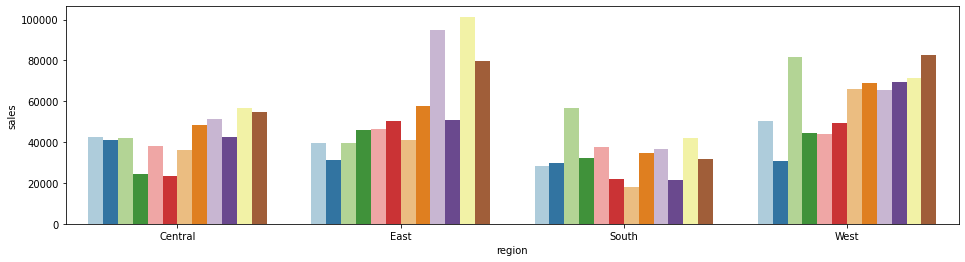

In [35]:
_df = agg_df.groupby(['region', 'month']).sum().reset_index()
fig, ax = plt.subplots(figsize=(16,4))
ax.set_axisbelow(True)
g= sns.barplot(ax=ax,
        x='region', 
        y='sales',
        hue='month',
        palette='Paired',
        data=_df)
plt.legend([], [], frameon=False)
plt.show()

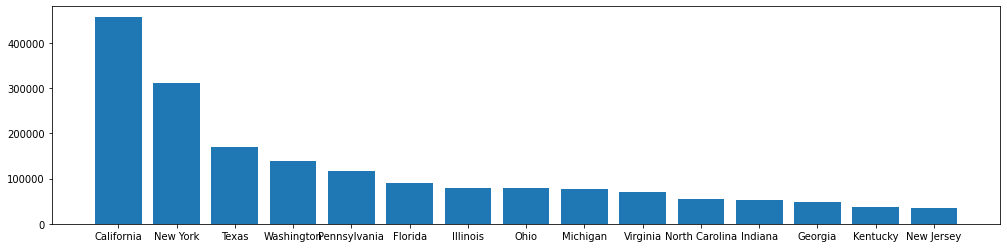

In [11]:
_df = agg_df.groupby('state')\
    .sum()\
    .sort_values('sales', ascending=False)\
    .head(15)
fig, ax = plt.subplots(figsize=(17,4))
ax.set_axisbelow(True)
plt.bar(
    x=_df.index,
    height=_df.sales
)
plt.show()

['Home Office' 'Corporate' 'Consumer']


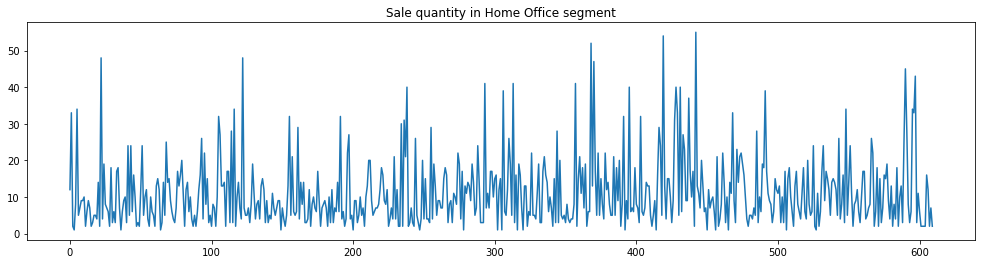

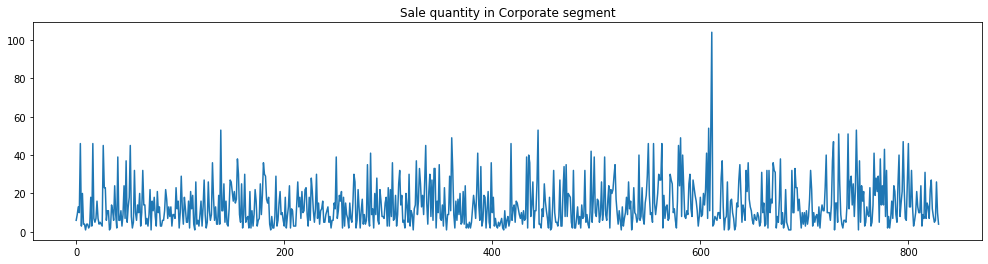

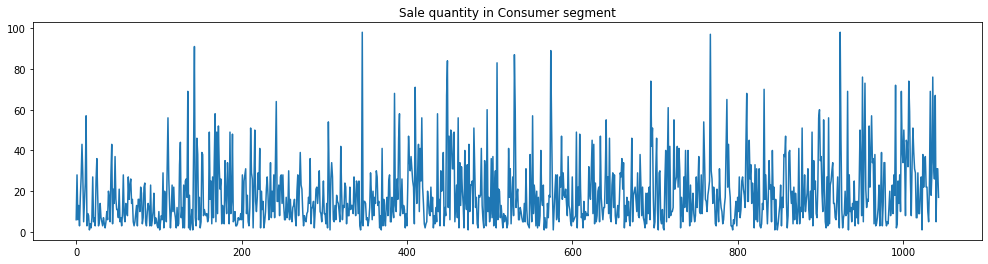

In [12]:
segment_list = agg_df.segment.unique()
print(segment_list)


for seg in segment_list:
    _df = agg_df[agg_df.segment == seg]\
            .sort_values('order_date')\
            .groupby(['order_date', 'segment'])\
            .sum()\
            .reset_index()
    
    fig, ax = plt.subplots(figsize=(17,4))
    ax.set_title('Sale quantity in {} segment'.format(seg))
    ax.set_axisbelow(True)
    plt.plot(_df.index, _df.quantity)
    plt.show()

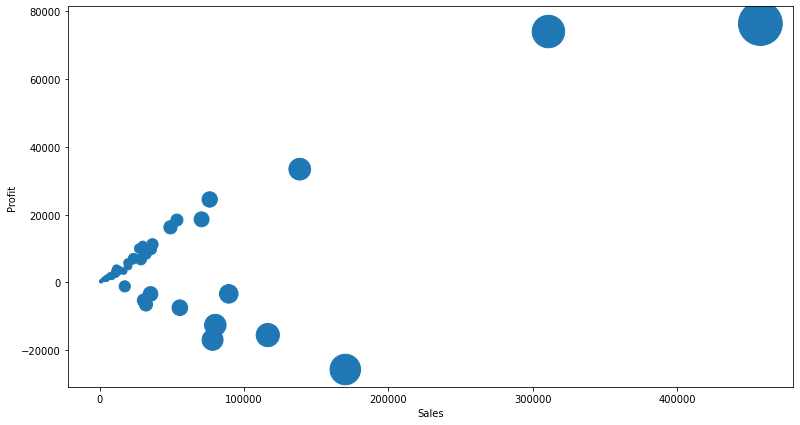

In [13]:
_df = agg_df.groupby('state').sum()
fig, ax = plt.subplots(figsize=(13,7))
ax.set_axisbelow(True)
plt.scatter(
    x=_df.sales,
    y=_df.profit,
    s=_df.quantity/4,
)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

         state   segment         category     year  month      sales  \
27  California  Consumer        Furniture   493842   1816  76459.880   
28  California  Consumer  Office Supplies  1259843   4494  71060.914   
29  California  Consumer       Technology   358775   1275  82115.286   

        profit  quantity  
27   4304.0399       922  
28  18350.9823      2431  
29  15719.0170       728  


<AxesSubplot:ylabel='segment'>

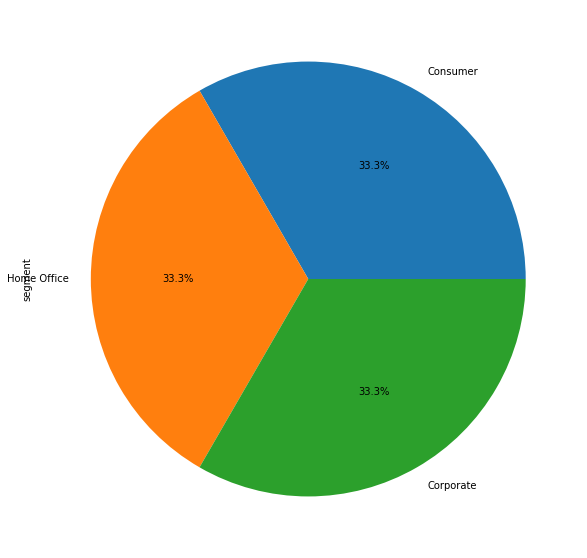

In [14]:
_df = agg_df.groupby(['state', 'segment', 'category']).sum().reset_index()
_df = _df[_df.state == 'California']
print(_df.head(3))

plt.figure(figsize=(12,10))
_df.segment.value_counts().plot.pie(autopct="%1.1f%%")

##  Task

- สินค้าประเภทไหนทำยอดขายมากที่ดสุด
- ยอดขายมีรูปแบบหรือไม่
- ในหนึ่งปีลูกค้ามักจะสั่งกี่ออเดอร์
- ส่วนลดมีผลต่อยอดขายหรือไม่
- ลูกค้าที่ไม่กลับมาใช้บริการเป็นลูกค้ากลุ่มไหน
